In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.utils import shuffle
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print (tf.__version__)

2.3.0


1.生成数据集

In [2]:
def normalize_feature(df):
    """
    PS : 要求传入的df是连续性变量
    
    Applies function along input axis(default 0) of DataFrame
    标准化方法有多种：
    归一化Max-Min
    实现中心化Z-Score
    用于稀疏数据的MaxAbs
    针对离群点的RobustScaler
    
    """
    return df.apply(lambda column: (column - column.mean()) / column.std())#特征缩放 z-score 标准化(zero-mean normalization)

In [3]:
dataset = load_boston()
dataset 
X = dataset.data
y = dataset.target
features = dataset.feature_names

In [4]:
dx = pd.DataFrame(X,columns=features)
dx.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
X_data,X_test,y_data,y_test = train_test_split(normalize_feature(dx),y,test_size=0.2,random_state=13)
X_train,X_valid,y_train,y_valid = train_test_split(X_data,y_data,test_size=0.2,random_state=13)

X_train = tf.cast(X_train,dtype=tf.float32)
X_valid = tf.cast(X_valid,dtype=tf.float32)
X_test = tf.cast(X_test,dtype=tf.float32)

In [6]:
X_train.shape
X_valid.shape
X_test.shape

TensorShape([102, 13])

In [7]:
def model(x,w,b): 
    return tf.matmul(x,w)+b
    
def loss(x,y,w,b):
    err = model(x,w,b) - y
    s = tf.reduce_mean(tf.square(err))
    return s
    
def grad(x,y,w,b):
    with tf.GradientTape() as tape: 
        return tape.gradient(loss(x,y,w,b),[w,b])



In [8]:
w = tf.Variable(tf.random.normal([13,1],mean=0,stddev=1,seed=7),dtype=tf.float32)  
b = tf.Variable(tf.random.normal([1,1],mean=0,stddev=1,seed=7),dtype=tf.float32)
lr = 0.001
optimizer = tf.keras.optimizers.SGD(lr)

In [10]:
loss_list_train = []
loss_list_valid = []
batch_size = 16
total_step = int(X_train.shape[0]/batch_size)
print (total_step)
epochs = 100

for epoch in range(epochs):
    for step in range(total_step):
        xs = X_train[step*batch_size:(step+1)*batch_size]
        ys = y_train[step*batch_size:(step+1)*batch_size]
        grads = grad(xs,ys,w,b)
        optimizer.apply_gradients(zip(grads,[w,b]))
    loss_train = loss(X_train,y_train,w,b).numpy()
    loss_valid = loss(X_valid,y_valid,w,b).numpy()
    loss_list_train.append(loss_train)
    loss_list_valid.append(loss_valid)
    print ("epoch={:3d},train_loss={:4f},valid_loss={:4f}".format(epoch+1,loss_train,loss_valid))



20
epoch=  1,train_loss=500.993561,valid_loss=451.190674
epoch=  2,train_loss=468.712006,valid_loss=421.801666
epoch=  3,train_loss=438.992188,valid_loss=394.650665
epoch=  4,train_loss=411.612183,valid_loss=369.569489
epoch=  5,train_loss=386.376221,valid_loss=346.404968
epoch=  6,train_loss=363.109344,valid_loss=325.016296
epoch=  7,train_loss=341.653564,valid_loss=305.272827
epoch=  8,train_loss=321.865112,valid_loss=287.053070
epoch=  9,train_loss=303.612732,valid_loss=270.244049
epoch= 10,train_loss=286.776031,valid_loss=254.740280
epoch= 11,train_loss=271.244324,valid_loss=240.443649
epoch= 12,train_loss=256.916016,valid_loss=227.262970
epoch= 13,train_loss=243.697388,valid_loss=215.113449
epoch= 14,train_loss=231.502014,valid_loss=203.916321
epoch= 15,train_loss=220.250397,valid_loss=193.598557
epoch= 16,train_loss=209.869049,valid_loss=184.092407
epoch= 17,train_loss=200.290466,valid_loss=175.335434
epoch= 18,train_loss=191.452194,valid_loss=167.269440
epoch= 19,train_loss=183.

In [11]:
print (w.numpy())
print (b.numpy())

[[ 0.00469626]
 [-0.33939725]
 [ 0.2602719 ]
 [-0.06893858]
 [-0.2946791 ]
 [ 0.47143573]
 [-0.08619058]
 [ 0.21416613]
 [ 0.62937766]
 [-0.44227645]
 [-0.43048158]
 [ 0.45248848]
 [ 0.3203115 ]]
[[22.50589]]


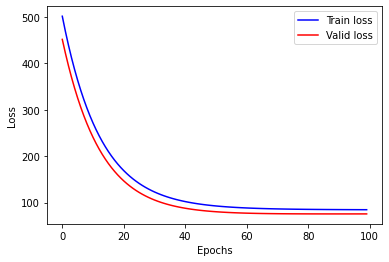

In [13]:
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_list_train,'blue',label='Train loss')
plt.plot(loss_list_valid,'red',label='Valid loss')
plt.legend(loc=1)

In [30]:
print("Test loss : {:f}".format(loss(X_test,y_test,w,b).numpy()))

Test loss : 91.894791


In [32]:
test_house_id = np.random.randint(0,X_test.shape[0])
y = y_test[test_house_id]
y_pred = tf.reshape(model(X_test,w,b)[test_house_id],()).numpy()
print ("House id {:d},Actual value is {:f},Predicted is :{:f}".format(test_house_id,y,y_pred))



House id 33,Actual value is 22.000000,Predicted is :22.499157
